In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Food Inspections

This information is derived from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program using a standardized procedure. The results of the inspection are inputted into a database, then reviewed and approved by a State of Illinois Licensed Environmental Health Practitioner (LEHP).

In [2]:
# Load in the data set
food = pd.read_csv('/home/yungshun/workspace/py3/feature-understanding/datasets/Food_Inspections.csv')

In [3]:
# View the first few rows and the headers
food.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2213756,EL SABOR POBLANO,EL SABOR POBLANO,2617275.0,Restaurant,Risk 1 (High),7027 N CLARK ST,CHICAGO,IL,60626.0,08/31/2018,License Re-Inspection,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",42.009856,-87.674012,"(42.009855708692335, -87.6740120532957)"
1,2213748,COZY NOODLES & RICE,COZY NOODLES & RICE,1384276.0,Restaurant,Risk 1 (High),3456 N SHEFFIELD AVE,CHICAGO,IL,60657.0,08/31/2018,Complaint Re-Inspection,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.945108,-87.654412,"(41.94510810433101, -87.65441181641037)"


In [4]:
# Get a sense of how many rows of data there are, if there are any missing values, and what data type each column has
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174498 entries, 0 to 174497
Data columns (total 17 columns):
Inspection ID      174498 non-null int64
DBA Name           174498 non-null object
AKA Name           172055 non-null object
License #          174482 non-null float64
Facility Type      169802 non-null object
Risk               174429 non-null object
Address            174498 non-null object
City               174343 non-null object
State              174470 non-null object
Zip                174425 non-null float64
Inspection Date    174498 non-null object
Inspection Type    174497 non-null object
Results            174498 non-null object
Violations         127635 non-null object
Latitude           173854 non-null float64
Longitude          173854 non-null float64
Location           173854 non-null object
dtypes: float64(4), int64(1), object(12)
memory usage: 22.6+ MB


In [5]:
# Another method to check for missing values
food.isnull().sum()

Inspection ID          0
DBA Name               0
AKA Name            2443
License #             16
Facility Type       4696
Risk                  69
Address                0
City                 155
State                 28
Zip                   73
Inspection Date        0
Inspection Type        1
Results                0
Violations         46863
Latitude             644
Longitude            644
Location             644
dtype: int64

In [6]:
# Show descriptive stats
food.describe()

,Inspection ID,License #,Zip,Latitude,Longitude
count,1.744980e+05,1.744820e+05,174425.000000,173854.000000,173854.000000
mean,1.343840e+06,1.556188e+06,60628.975714,41.880792,-87.676428
std,5.976811e+05,8.874371e+05,22.660722,0.080741,0.058748
min,4.424700e+04,0.000000e+00,60007.000000,41.644670,-87.914428
25%,1.098571e+06,1.167172e+06,60614.000000,41.832144,-87.707598
50%,1.434308e+06,1.948193e+06,60625.000000,41.891689,-87.666366
75%,1.938004e+06,2.203552e+06,60643.000000,41.939659,-87.634804
max,2.213756e+06,9.999999e+06,60827.000000,42.021064,-87.525094


### Qualitative data

In [7]:
food['Results'].unique()

array(['Pass w/ Conditions', 'No Entry', 'Out of Business', 'Pass',
       'Fail', 'Not Ready', 'Business Not Located'], dtype=object)

In [8]:
food['Risk'].unique()

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)', 'All', nan],
      dtype=object)

### Nominal level

Text(0.5,1,'Number of Zipcodes by Risk')

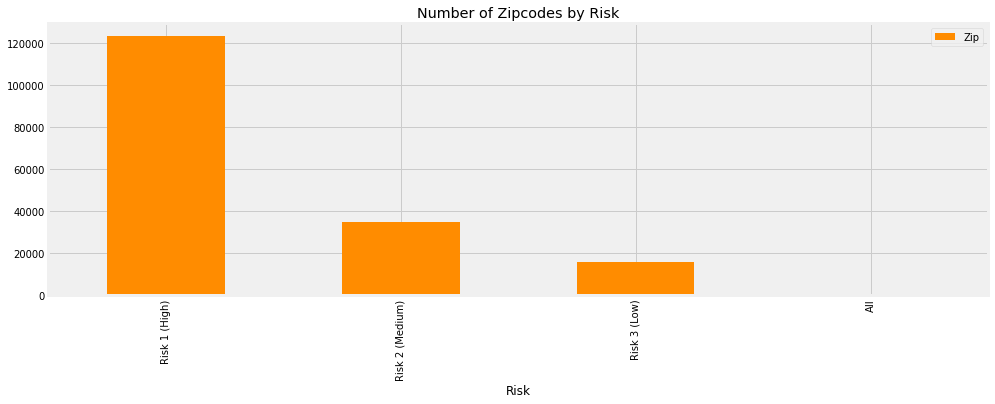

In [9]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Risk')[['Zip']].count().sort_values(
    'Zip', ascending=False).tail(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Number of Zipcodes by Risk')

Text(0.5,1,'Risk by Inspection Type')

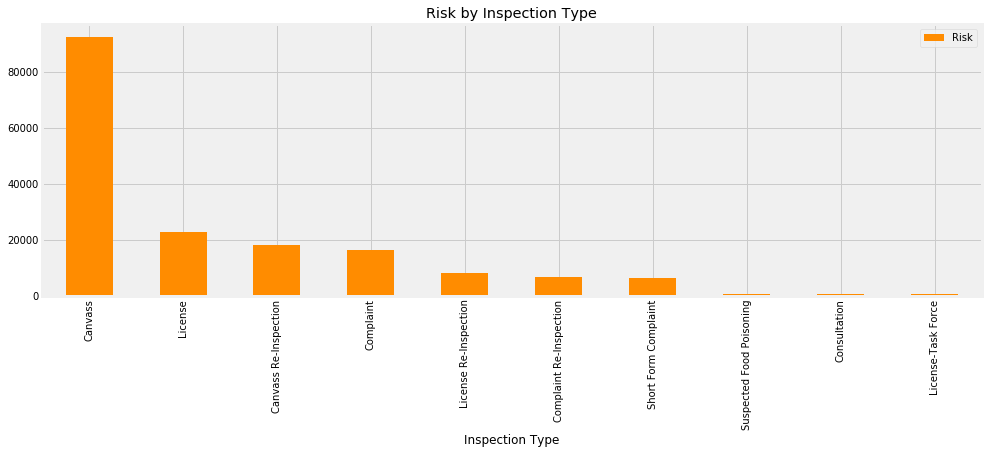

In [10]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Inspection Type')[['Risk']].count().sort_values(
    'Risk', ascending=False).head(10).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Risk by Inspection Type')

### Ordinal level

In [11]:
# Clean risk to numeric values (convert from nominal data to ordinal data)

In [12]:
food['Risk'] = food['Risk'].astype(str)

In [13]:
food['Risk'] = food['Risk'].map(lambda value: value.replace('Risk', '').replace('(High)', '').replace('(Low)', '').replace('(Medium)', '').replace('All', '0').replace('nan', '0'))

In [14]:
food['Risk'] = food['Risk'].astype(int)

Text(0.5,1,'Mean Risk by Inspection Type')

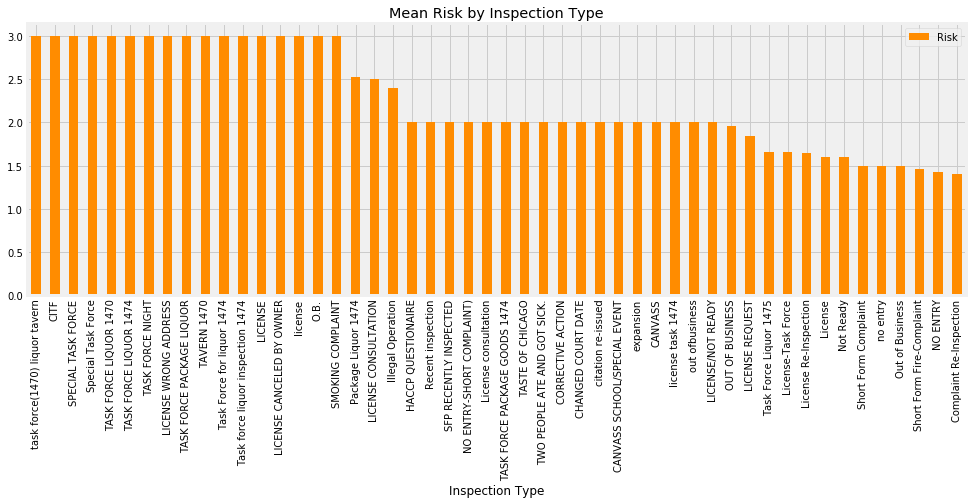

In [15]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

food.groupby('Inspection Type')[['Risk']].mean().sort_values(
    'Risk', ascending=False).head(50).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Mean Risk by Inspection Type')